# Module 6 Class 4: Data Visualization and Matplotlib

In this activity, you will work directly with the Python visualization library called `matplotlib`. At first, you will be working with NBA Player Data and Salaries. Try to uncover some trends about the data that aren't totally obvious upon first glance!

**Pro Tip:** The Opportunity Through Data online [textbook](https://otd.gitbook.io/book/module-6/data-visualization/matplotlib) and `matplotlib` [documenation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot) may be incredibly helpful.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
nba = pd.read_csv("nba_salaries.csv", index_col=0)
nba

,Player,Draft Pick,Salary,Pos,Age,Team,Games Played
0,Zhou Qi,43,815615,C,22,HOU,16
1,Zaza Pachulia,42,3477600,C,33,GSW,66
2,Zach Randolph,19,12307692,PF,36,SAC,59
3,Zach LaVine,13,3202217,SG,22,CHI,24
4,Zach Collins,10,3057240,C,20,POR,62
...,...,...,...,...,...,...,...
644,Al Jefferson,15,9769821,C,33,IND,34
645,Al Horford,3,27734405,C,31,BOS,70
647,Abdel Nader,58,1167333,SF,24,BOS,44
649,Aaron Gordon,4,5504420,PF,22,ORL,55


## Scatter Plots

**Question One:** Create a scatter plot using `matplotlib` that plots the `Salary` of all the players in the DataFrame with their respective `Draft Pick`. Is there a clear pattern?

1. Plot the figure below according to the above specifications.
2. Label the axes appropriately using methods learned in class from `matplotlib`.
3. Give the plot a meaningful title.

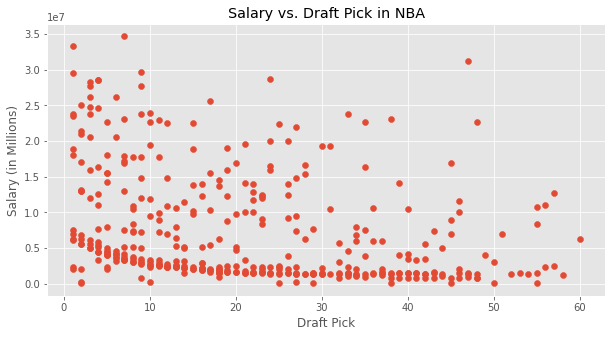

In [3]:
plt.figure(figsize=(10,5))
plt.scatter(nba['Draft Pick'], nba['Salary']);
plt.xlabel('Draft Pick')
plt.ylabel('Salary (in Millions)')
plt.title('Salary vs. Draft Pick in NBA')
plt.show()

## Bar Charts

**Question Two:** Create a bar chart that displays the average salary for each position `Pos` in the DataFrame. Use functions we have learned earlier this module! Which position has the highest average salary?

1. Create the bar chart according to the specifications
2. Add meaningful labels for axes and a relevant title

For an added challenge, try to create a bar chart where the bars are in **decreasing order** with respect to their heights. Use an additional Pandas method `.sort_values(by="Column Name")` to achieve this result.

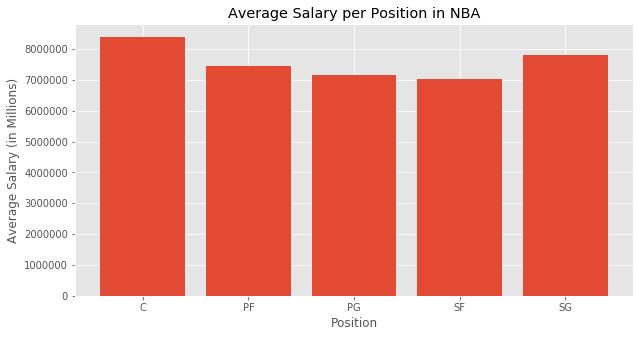

In [35]:
plt.figure(figsize=(10,5))
grouped_by_pos = nba.groupby("Pos").mean()
plt.bar(grouped_by_pos.index, grouped_by_pos['Salary'])
plt.xlabel('Position')
plt.ylabel('Average Salary (in Millions)')
plt.title('Average Salary per Position in NBA')
plt.show()

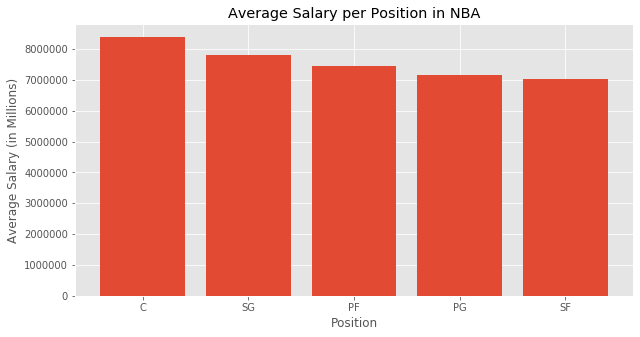

In [36]:
## Sorted by position

plt.figure(figsize=(10,5))
grouped_by_pos = nba.groupby("Pos").mean().sort_values(by='Salary', ascending=False)
plt.bar(grouped_by_pos.index, grouped_by_pos['Salary'])
plt.xlabel('Position')
plt.ylabel('Average Salary (in Millions)')
plt.title('Average Salary per Position in NBA')
plt.show()

**Question Three:** Create a *horizontal* bar chart that shows the salaries of the **ten highest paid NBA players** using `matplotlib`'s `barh` method. The bars should be sorted in *increasing order*, with the highest paid player on the bottom. As always, add the appropriate labels!

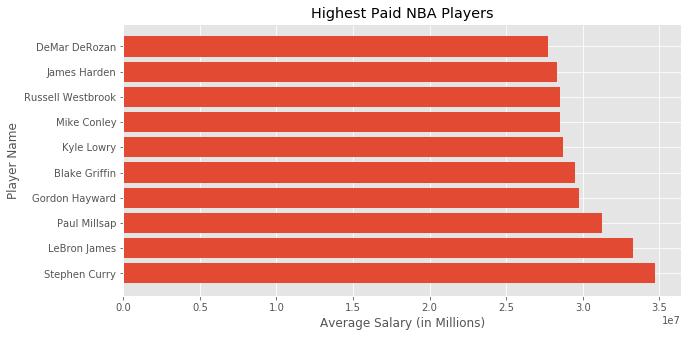

In [37]:
plt.figure(figsize=(10,5))
top_10 = nba.sort_values(by="Salary", ascending=False).iloc[:10, :]
plt.barh(top_10['Player'], top_10['Salary'])
plt.xlabel('Average Salary (in Millions)')
plt.ylabel('Player Name')
plt.title('Highest Paid NBA Players')
plt.show()

## Histograms

**Question Four:** Create a histogram that shows the distribution of `Games Played` for the entire data set with appropriate labels. What can you observe from the trends?

**NOTE:** The y-label of the histogram can be difficult to come up with -- it is not as clear as it has been for other visualizations within this activity. Think hard about what both the **height** and **area** of the plot represent. 

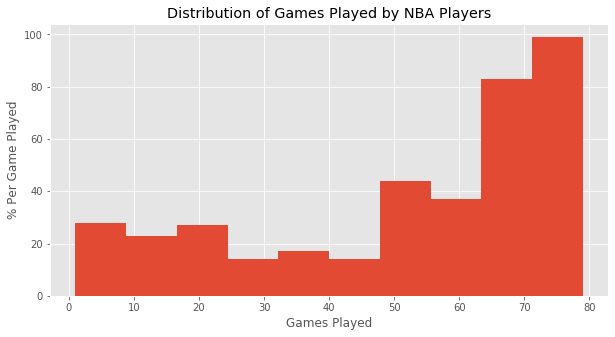

In [43]:
plt.figure(figsize=(10,5))
plt.hist(nba['Games Played'])
plt.xlabel('Games Played')
plt.ylabel('% Per Game Played')
plt.title('Distribution of Games Played by NBA Players')
plt.show()

**Question Five:** Create two new Pandas DataFrames called `centers` and `point_guards` that contain only the information of their respective position. Recall that all the **centers** within the original data set will have `Pos` as "C" and all the **point guards** will have `Pos` as "PG. 

We will use these two new DataFrames in order to compare the distribution of salaries between each position.

In [3]:
centers = nba[nba['Pos'] == 'C']
centers.head()

,Player,Draft Pick,Salary,Pos,Age,Team,Games Played
0,Zhou Qi,43,815615,C,22,HOU,16
1,Zaza Pachulia,42,3477600,C,33,GSW,66
4,Zach Collins,10,3057240,C,20,POR,62
10,Willy Hernangomez,35,1435750,C,23,TOT,45
16,Willie Cauley-Stein,6,3704160,C,24,SAC,70


In [4]:
point_guards = nba[nba['Pos'] == 'PG']
point_guards.head()

,Player,Draft Pick,Salary,Pos,Age,Team,Games Played
23,Wade Baldwin,17,1874400,PG,21,POR,4
29,Tyus Jones,24,1471382,PG,21,MIN,78
32,Tyreke Evans,4,3290000,PG,28,MEM,52
36,Tyler Ulis,34,1312611,PG,22,PHO,68
39,Tyler Ennis,18,1524305,PG,23,LAL,50


Now, using your newly created DataFrames `centers` and `point_guards`, plot the two distributions of their respective salaries using a histogram.

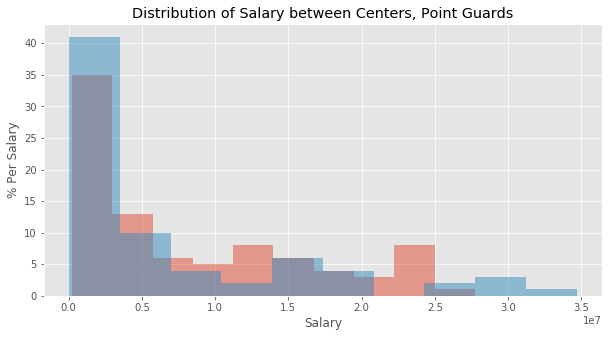

In [64]:
plt.figure(figsize=(10,5))
plt.hist(centers['Salary'], alpha=0.5)
plt.hist(point_guards['Salary'], alpha=0.5)
plt.xlabel('Salary')
plt.ylabel('% Per Salary')
plt.title('Distribution of Salary between Centers, Point Guards')
plt.show()

If you created the histogram above correctly, you will notice that the `point_guards` distribution skews further out to the right! Our visualization allowed us to see this easier than we could have by simply looking at the raw data or at a DataFrame.

**Question Six:** Using this information and the `point_guards` DataFrame, return a list of all the point guards that have a salary greater than or equal to 25 Million Dollars. Do you recognize any of them?

In [10]:
big_money = point_guards[point_guards['Salary'] >= 2.5e7]
over_25_million = list(big_money['Player'])
over_25_million

['Stephen Curry',
 'Russell Westbrook',
 'Mike Conley',
 'Kyle Lowry',
 'Damian Lillard']

**Interestingly enough,** we see that there are five point guards that make over 25 million, while there is only one center that earns a salary in that range, despite centers having the highest average salary.